In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Important Terms
- Clinical Case: The scenario (e.g., symptoms, complaints, concerns) the Standardized Patient presents to the test taker (medical student, resident or physician). Ten clinical cases are represented in this dataset.
- Patient Note: Text detailing important information related by the patient during the encounter (physical exam and interview).
- Feature: A clinically relevant concept. A rubric describes the key concepts relevant to each case.

# About Data

## 1. patient_notes.csv
- A collection of about 40,000 Patient Note history portions. Only a subset of these have features annotated. You may wish to apply unsupervised learning techniques on the notes without annotations. The patient notes in the test set are not included in the public version of this file.
    - pn_num - A unique identifier for each patient note.
    - case_num - A unique identifier for the clinical case a patient note represents.
    - pn_history - The text of the encounter as recorded by the test taker.

#### Loading patient_notes.csv

In [6]:
patient_notes = pd.read_csv('../input/nbme-score-clinical-patient-notes/patient_notes.csv')
patient_notes.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


#### Patient notes 's info()

In [7]:
patient_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42146 entries, 0 to 42145
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pn_num      42146 non-null  int64 
 1   case_num    42146 non-null  int64 
 2   pn_history  42146 non-null  object
dtypes: int64(2), object(1)
memory usage: 987.9+ KB


#### NaN counts of Patient notes

In [8]:
patient_notes.isnull().sum()

pn_num        0
case_num      0
pn_history    0
dtype: int64

#### Unique counts

In [9]:
print(f'Unique case_num count in patient_notes : {len(patient_notes["case_num"].value_counts())}')
print(f'Unique pn_num count in patient_notes : {len(patient_notes["pn_num"].value_counts())}')
print(f'Unique pn_history count in patient_notes : {len(patient_notes["pn_history"].value_counts())}')

Unique case_num count in patient_notes : 10
Unique pn_num count in patient_notes : 42146
Unique pn_history count in patient_notes : 42146


#### Bar graph of case_num's count

In [10]:
case_num_counts = patient_notes['case_num'].value_counts()
print(case_num_counts)

3    9753
5    6909
4    5405
9    5151
8    4196
7    4101
0    2268
2    1958
6    1597
1     808
Name: case_num, dtype: int64


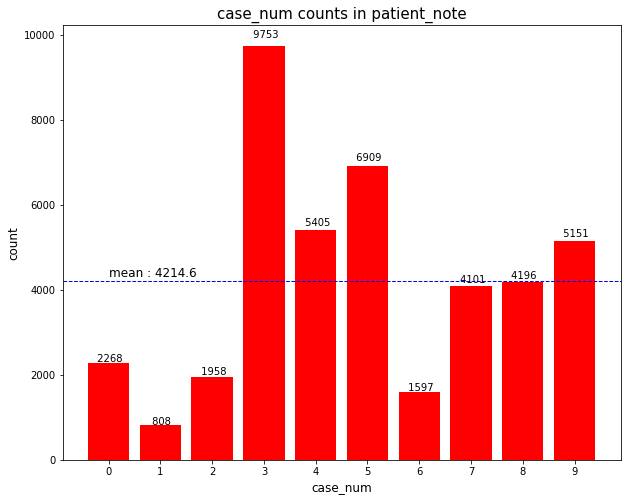

In [11]:
plt.figure(figsize=(10, 8))
bar = plt.bar(case_num_counts.index, case_num_counts.values, color='red')
for i in bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, height*1.019, '% d' % height, ha = 'center')
plt.axhline(case_num_counts.values.mean(), label='count mean', 
            color = 'blue', linewidth=1, linestyle='--')
plt.text(0, 4300, f'mean : {case_num_counts.values.mean()}', fontsize=12)
plt.xticks(case_num_counts.index)
plt.xlabel('case_num', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('case_num counts in patient_note', fontsize = 15)
plt.show()


### example of 'pn_history'

In [12]:
print(patient_notes['pn_history'][0])

17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment
-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav
-associated with dispnea on exersion and rest,stressed out about school
-reports fe feels like his heart is jumping out of his chest
-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam
-pmh:non,meds :aderol (from a friend),nkda
-fh:father had MI recently,mother has thyroid dz
-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school
-sh:no std


In [13]:
pn_history_len = []
pn_num_list=[]
for i in range(len(patient_notes)):
    pn_history_len.append(len(patient_notes['pn_history'][i]))
    pn_num_list.append(patient_notes['pn_num'][i])

print(f'Average length of "pn_history" : {np.mean(pn_history_len):.6f}')

Average length of "pn_history" : 818.176814


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


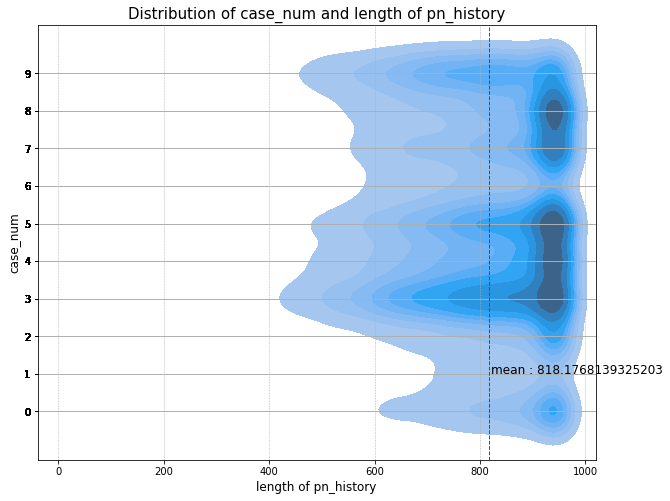

In [14]:
plt.figure(figsize=(10, 8))
plt.grid(True, lw = 0.5, ls = '--')
sns.kdeplot(pn_history_len, patient_notes['case_num'], shade = True)
plt.axvline(np.mean(pn_history_len), label='length mean', 
            color = 'red', linewidth=1, linestyle='--')
plt.text(821, 1, f'mean : {np.mean(pn_history_len)}', fontsize=12)
plt.title('Distribution of case_num and length of pn_history', fontsize = 15)
plt.xlabel('length of pn_history', fontsize = 12)
plt.ylabel('case_num', fontsize = 12)
plt.yticks(patient_notes['case_num'])
plt.show()

In [15]:
print(f'Length of patient_notes : {len(pn_num_list)}')
print(f'Last number of pn_num : {pn_num_list[-1]}')
print(f'the number of the missing pn_num(not in patient_notes) : {pn_num_list[-1] - len(pn_num_list)}')

Length of patient_notes : 42146
Last number of pn_num : 95334
the number of the missing pn_num(not in patient_notes) : 53188


## 2. features.csv 
- The rubric of features (or key concepts) for each clinical case.
    - feature_num - A unique identifier for each feature.
    - case_num - A unique identifier for each case.
    - feature_text - A description of the feature.

- There is no NaN value in this dataframe.
- 143 rows
- 3 columns
- data types : int64(2), object(1)

In [16]:
features = pd.read_csv('../input/nbme-score-clinical-patient-notes/features.csv')
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   feature_num   143 non-null    int64 
 1   case_num      143 non-null    int64 
 2   feature_text  143 non-null    object
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [18]:
features.isnull().sum()

feature_num     0
case_num        0
feature_text    0
dtype: int64

In [19]:
print(f'Unique feature_num count in features : {len(features["feature_num"].value_counts())}')
print(f'Unique case_num count in features : {len(features["case_num"].value_counts())}')
print(f'Unique feature_text count in features : {len(features["feature_text"].value_counts())}')

Unique feature_num count in features : 143
Unique case_num count in features : 10
Unique feature_text count in features : 131


In [20]:
features_case_num_count = features['case_num'].value_counts()
print(features_case_num_count)

5    18
8    18
2    17
9    17
3    16
0    13
1    13
6    12
4    10
7     9
Name: case_num, dtype: int64


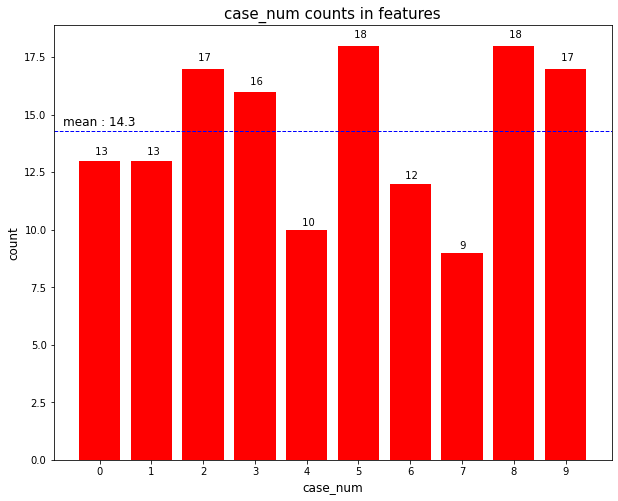

In [21]:
plt.figure(figsize=(10, 8))
bar = plt.bar(features_case_num_count.index, features_case_num_count.values, color = 'red')
for i in bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, height*1.019, '% d' % height, ha = 'center')
plt.axhline(features_case_num_count.values.mean(), label='count mean', 
            color = 'blue', linewidth=1, linestyle='--')
plt.text(-0.7, 14.5, f'mean : {features_case_num_count.values.mean()}', fontsize=12)
plt.xticks(features_case_num_count.index)
plt.xlabel('case_num', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('case_num counts in features', fontsize = 15)
plt.show()

In [22]:
feature_text_len = []
feature_num_list=[]
for i in range(len(features)):
    feature_text_len.append(len(features['feature_text'][i]))
    feature_num_list.append(features['feature_num'][i])

print(f'Average length of "feature_text" : {np.mean(feature_text_len):.6f}')

Average length of "feature_text" : 23.209790


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


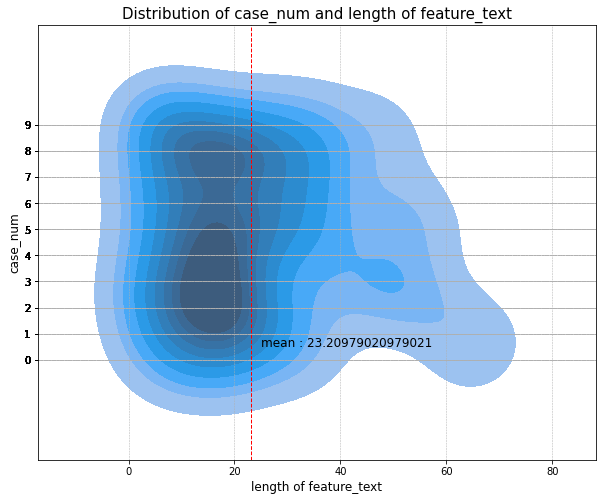

In [23]:
plt.figure(figsize=(10, 8))
plt.grid(True, lw = 0.5, ls = '--')
sns.kdeplot(feature_text_len, features['case_num'], shade = True)
plt.axvline(np.mean(feature_text_len), label='length mean', 
            color = 'red', linewidth=1, linestyle='--')
plt.text(25, 0.5, f'mean : {np.mean(feature_text_len)}', fontsize=12)
plt.title('Distribution of case_num and length of feature_text', fontsize = 15)
plt.xlabel('length of feature_text', fontsize = 12)
plt.ylabel('case_num', fontsize = 12)
plt.yticks(features['case_num'])
plt.show()

## 3. train.csv 
- Feature annotations for 1000 of the patient notes, 100 for each of ten cases.
    - id - Unique identifier for each patient note / feature pair.
    - pn_num - The patient note annotated in this row.
    - feature_num - The feature annotated in this row.
    - case_num - The case to which this patient note belongs.
    - annotation - The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note.
    - location - Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;.

- There is no NaN value in this dataframe.
    - But, there are some empty [] in 'annotation', 'location'.
        - There are 4,399 rows with 'annotation' = '[]' and 'location' = '[]'.
        - 'annotation = []' == 'location = []'
- 14,300 rows
- 6 columns
- data types : int64(3), object(3)

In [24]:
train = pd.read_csv('../input/nbme-score-clinical-patient-notes/train.csv')
train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14300 non-null  object
 1   case_num     14300 non-null  int64 
 2   pn_num       14300 non-null  int64 
 3   feature_num  14300 non-null  int64 
 4   annotation   14300 non-null  object
 5   location     14300 non-null  object
dtypes: int64(3), object(3)
memory usage: 670.4+ KB


In [26]:
train.isnull().sum()

id             0
case_num       0
pn_num         0
feature_num    0
annotation     0
location       0
dtype: int64

In [27]:
empty_annotation = train['annotation'] == '[]'
print(f'Number of Empty annotations = {train[empty_annotation].shape[0]}')

empty_location = train['location'] == '[]'
print(f'Number of Empty locations = {train[empty_location].shape[0]}')

empty = (train['location'] == '[]') & (train['annotation'] == '[]')
print(f'Number of Empty annotations and locations = {train[empty].shape[0]}')

Number of Empty annotations = 4399
Number of Empty locations = 4399
Number of Empty annotations and locations = 4399


In [28]:
pn_count = train['pn_num'].value_counts()
print(f'Counts of unique pn_num in train: {len(pn_count)}')

Counts of unique pn_num in train: 1000


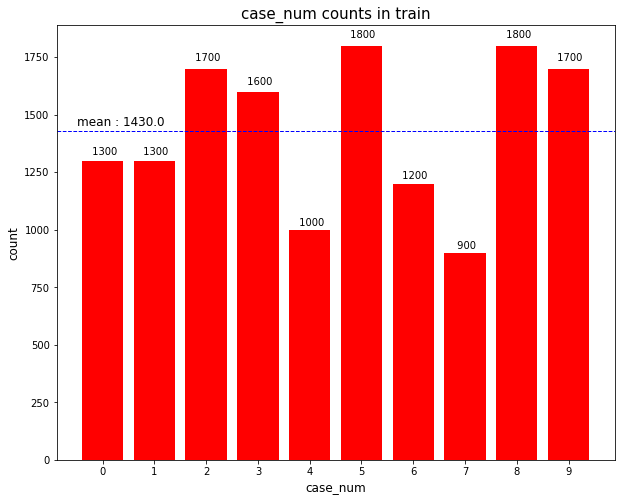

In [29]:
train_case_num_count = train['case_num'].value_counts()

plt.figure(figsize=(10, 8))
bar = plt.bar(train_case_num_count.index, train_case_num_count.values, color = 'red')
for i in bar:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2.0, height*1.019, '% d' % height, ha = 'center')
plt.axhline(train_case_num_count.values.mean(), label='count mean', 
            color = 'blue', linewidth=1, linestyle='--')
plt.text(-0.5, 1450, f'mean : {train_case_num_count.values.mean()}', fontsize=12)
plt.xticks(train_case_num_count.index)
plt.xlabel('case_num', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.title('case_num counts in train', fontsize = 15)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


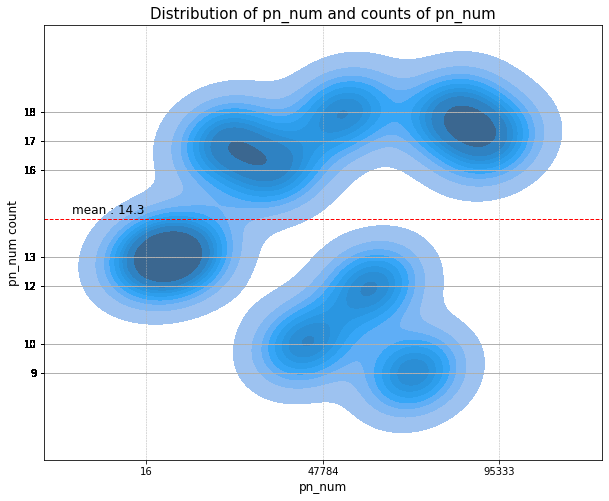

In [30]:
train_pn_num_count = train['pn_num'].value_counts()
plt.figure(figsize=(10, 8))
plt.grid(True, lw = 0.5, ls = '--')
sns.kdeplot(train_pn_num_count.index, train_pn_num_count.values, shade = True)
plt.axhline(np.mean(train_pn_num_count.values), label='length mean', 
            color = 'red', linewidth=1, linestyle='--')
plt.text(-20000, 14.5, f'mean : {np.mean(train_pn_num_count.values)}', fontsize=12)
plt.title('Distribution of pn_num and counts of pn_num', fontsize = 15)
plt.xlabel('pn_num', fontsize = 12)
plt.ylabel('pn_num count', fontsize = 12)
plt.xticks([np.min(train_pn_num_count.index), np.median(train_pn_num_count.index), np.max(train_pn_num_count.index)])
plt.yticks(train_pn_num_count.values)
plt.show()

### Example of annotation

In [31]:
print(train['annotation'][0])
print(train['annotation'][3])

['dad with recent heart attcak']
['intermittent episodes', 'episode']


In [32]:
train[:10]

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']
5,00016_005,0,16,5,[],[]
6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']"
7,00016_007,0,16,7,[],[]
8,00016_008,0,16,8,[],[]
9,00016_009,0,16,9,"['palpitations', 'heart beating/pounding']","['26 38', '96 118']"


### Annotation Count Distribution

In [33]:
train['annotation'][3]

"['intermittent episodes', 'episode']"

In [34]:
len(np.array(train['annotation'][3])

SyntaxError: unexpected EOF while parsing (511982723.py, line 1)

In [ ]:
annotation_len_list = []
tmp_len = 0

for i in range(len(train)):
    tmp_len = np.array(train['annotation'][i]).size
    annotation_len_list.append(tmp_len)
print(annotation_len_list)
                  

In [ ]:
len(train['annotation'][5].split(','))

In [ ]:
pn = 16
feature = 0
case = 0

train_case = train['case_num'] == case
train_feature = train['feature_num'] == feature
train_pn = train['pn_num'] == pn

In [ ]:
print(f"Patient Notes : \n")
print(patient_notes['pn_history'][16])
print(f"{'-'*100}")
print(f"Annotations : \n")
print(train[train_pn]['annotation'])

In [ ]:
e = []
r = []
l = ['intermittent episodes', 'episode']
e.append(np.array(l))
e.append(np.array(r))
print(len(np.array(r)))

# References :
https://www.kaggle.com/code/odins0n/nbme-detailed-eda#EDA   
https://www.kaggle.com/code/utcarshagrawal/nbme-complete-eda#IMPORTING-LIBRARIES   
